In [ ]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image
print(tf.__version__)

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
assert x_train.shape == (60000, 28, 28)  # 60000 train images of 28x28 pixel.
assert x_test.shape == (10000, 28, 28)   # 10000 test images of 28x28 pixel.
assert y_train.shape == (60000,)         # Each of 60000 train image has a label.
assert y_test.shape == (10000,)          # Each of 10000 test image has a label.

# No assertion error signifies that the dimensions from the data set matches.

In [3]:
def seeDigits(dataset):
    plt.figure(figsize=(10,10))
    for i in range(0,25):
        plt.subplot(5,5,i+1)
        plt.imshow(dataset[i],aspect=1,cmap='gray')
    plt.show()

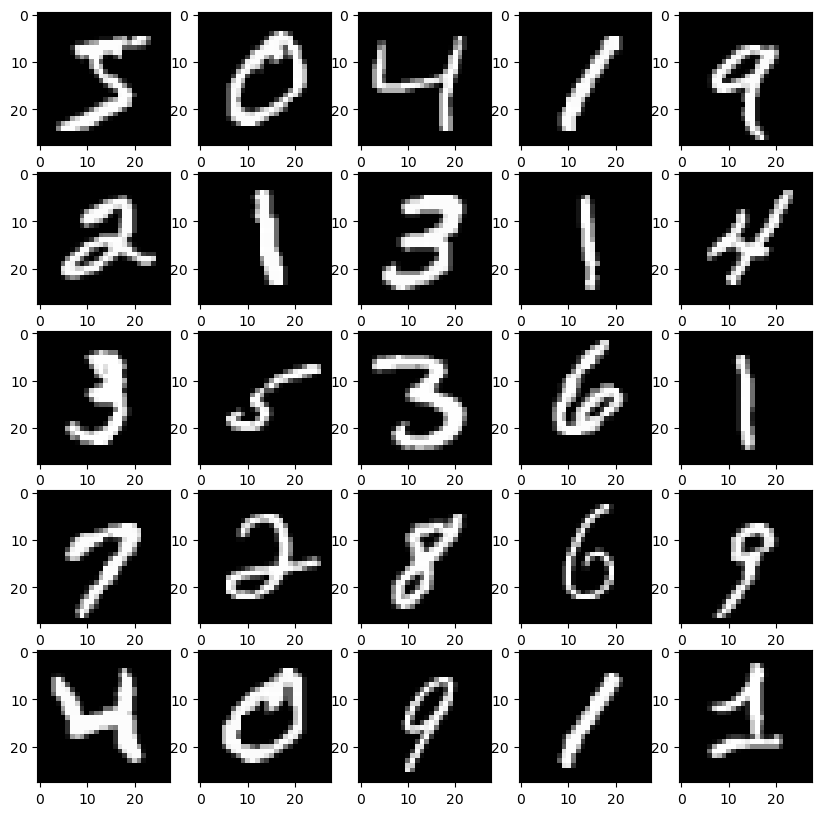

In [4]:
seeDigits(x_train)

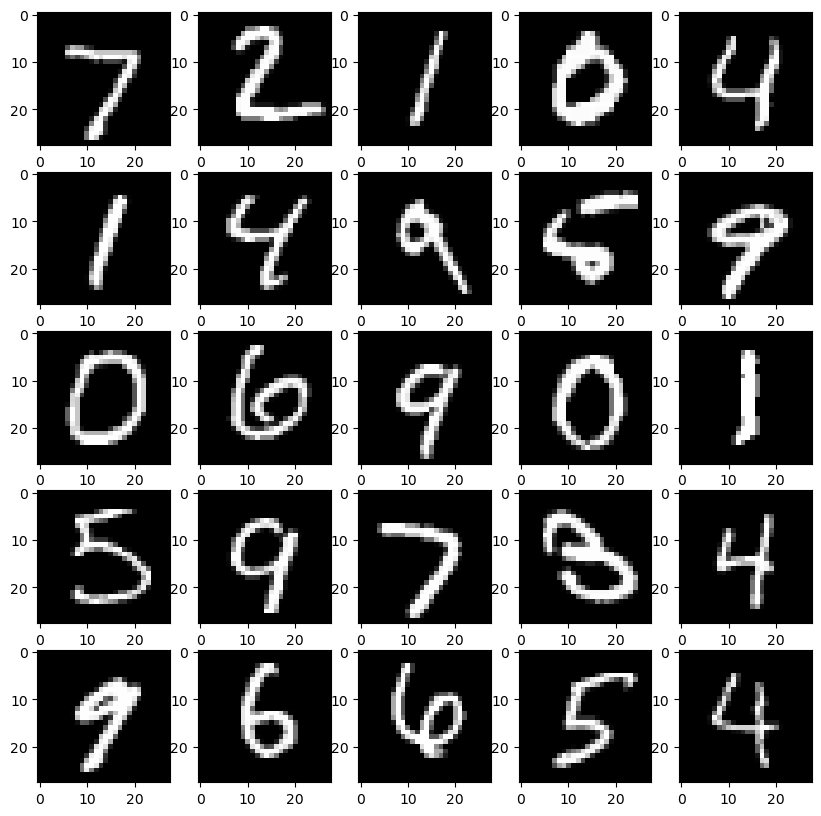

In [5]:
seeDigits(x_test)

Normalize the pixels

In [6]:
x_train=x_train/255
x_test=x_test/255

Model Creation

In [7]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1),activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(64,kernel_size=(3,3), input_shape=(28,28,1),activation=tf.nn.relu),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation=tf.nn.relu),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])

2024-09-12 08:29:43.830838: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 flatten (Flatten)           (None, 7744)              0         
                                                                 
 dense (Dense)               (None, 128)               991360    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

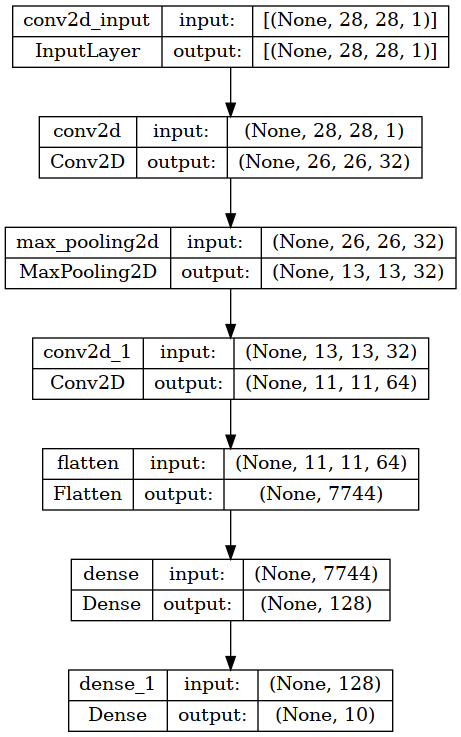

In [9]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

Training

In [ ]:
class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        print(logs)
        if(logs.get('accuracy')>=0.99):
            print("Cancelling futher training, Accuracy of 99% reached")
            self.model.stop_training=True
            


training=model.fit(x_train, y_train, epochs=10, batch_size=32, callbacks=[CustomCallback()])
print(training.epoch, training.history['accuracy'][-1])

In [ ]:
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [11]:
model.save('trained_model.h5')

Predicting

In [ ]:
res = model.predict(x_test[11:12])
print(res)

In [ ]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
res = probability_model.predict(x_test[11:12])
index = np.argmax(res)
print(res)
print(index)

In [ ]:
# display the digit images we created 
img_names = ['0.png', '1.png','2.png','3.png','4.png','5.png','6.png','7.png','8.png','9.png']
img_dir='./images'
imgs = [np.array(Image.open(os.path.join(img_dir, img_name))) for img_name in img_names]

plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(imgs[i], aspect=1, cmap='gray')
plt.show()

In [ ]:
def predict():
    img_data = np.array(imgs)
    res = probability_model.predict(img_data)
    print([np.argmax(a) for a in res])
predict()

In [ ]:
img_input = x_test[18:19]
print(img_input.shape)
res = model.predict(img_input)
print(res)
print([np.argmax(a) for a in res])
plt.imshow(img_input.reshape(28, 28), aspect=1, cmap='gray')